# matplotlib - settings consideration

In [15]:
import os
import re
import shutil
from glob import glob
from matplotlib import matplotlib_fname
from matplotlib import get_cachedir

# Copy files over
_dir_data = re.sub('/matplotlibrc$', '', matplotlib_fname())
dir_source = r"C:\Users\Rog G16\Downloads\fonts"
dir_dest = os.path.join(os.path.split(_dir_data)[0], 'fonts', 'ttf')
# print(f'Transfering .ttf and .otf files from {dir_source} to {dir_dest}.')
for file in glob(f'{dir_source}/*.[ot]tf'):
    if not os.path.exists(f'{dir_dest}/{os.path.basename(file)}'):
        print(f'Adding font "{os.path.basename(file)}".')
        shutil.copy(file, dir_dest)

# Delete cache
dir_cache = get_cachedir()
for file in glob(f'{dir_cache}/*.cache') + glob(f'{dir_cache}/font*'):
    if not os.path.isdir(file): # don't dump the tex.cache folder... because dunno why
        os.remove(file)
        print(f'Deleted font cache {file}.')

Adding font "Helvetica-Bold.ttf".
Adding font "Helvetica-BoldOblique.ttf".
Adding font "helvetica-compressed-5871d14b6903a.otf".
Adding font "helvetica-light-587ebe5a59211.ttf".
Adding font "Helvetica-Oblique.ttf".
Adding font "helvetica-rounded-bold-5871d05ead8de.otf".
Adding font "Helvetica.ttf".
Deleted font cache C:\Users\Rog G16\.matplotlib\fontlist-v390.json.


In [23]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 3;'>{}</div>".format(code))

# Slide 1

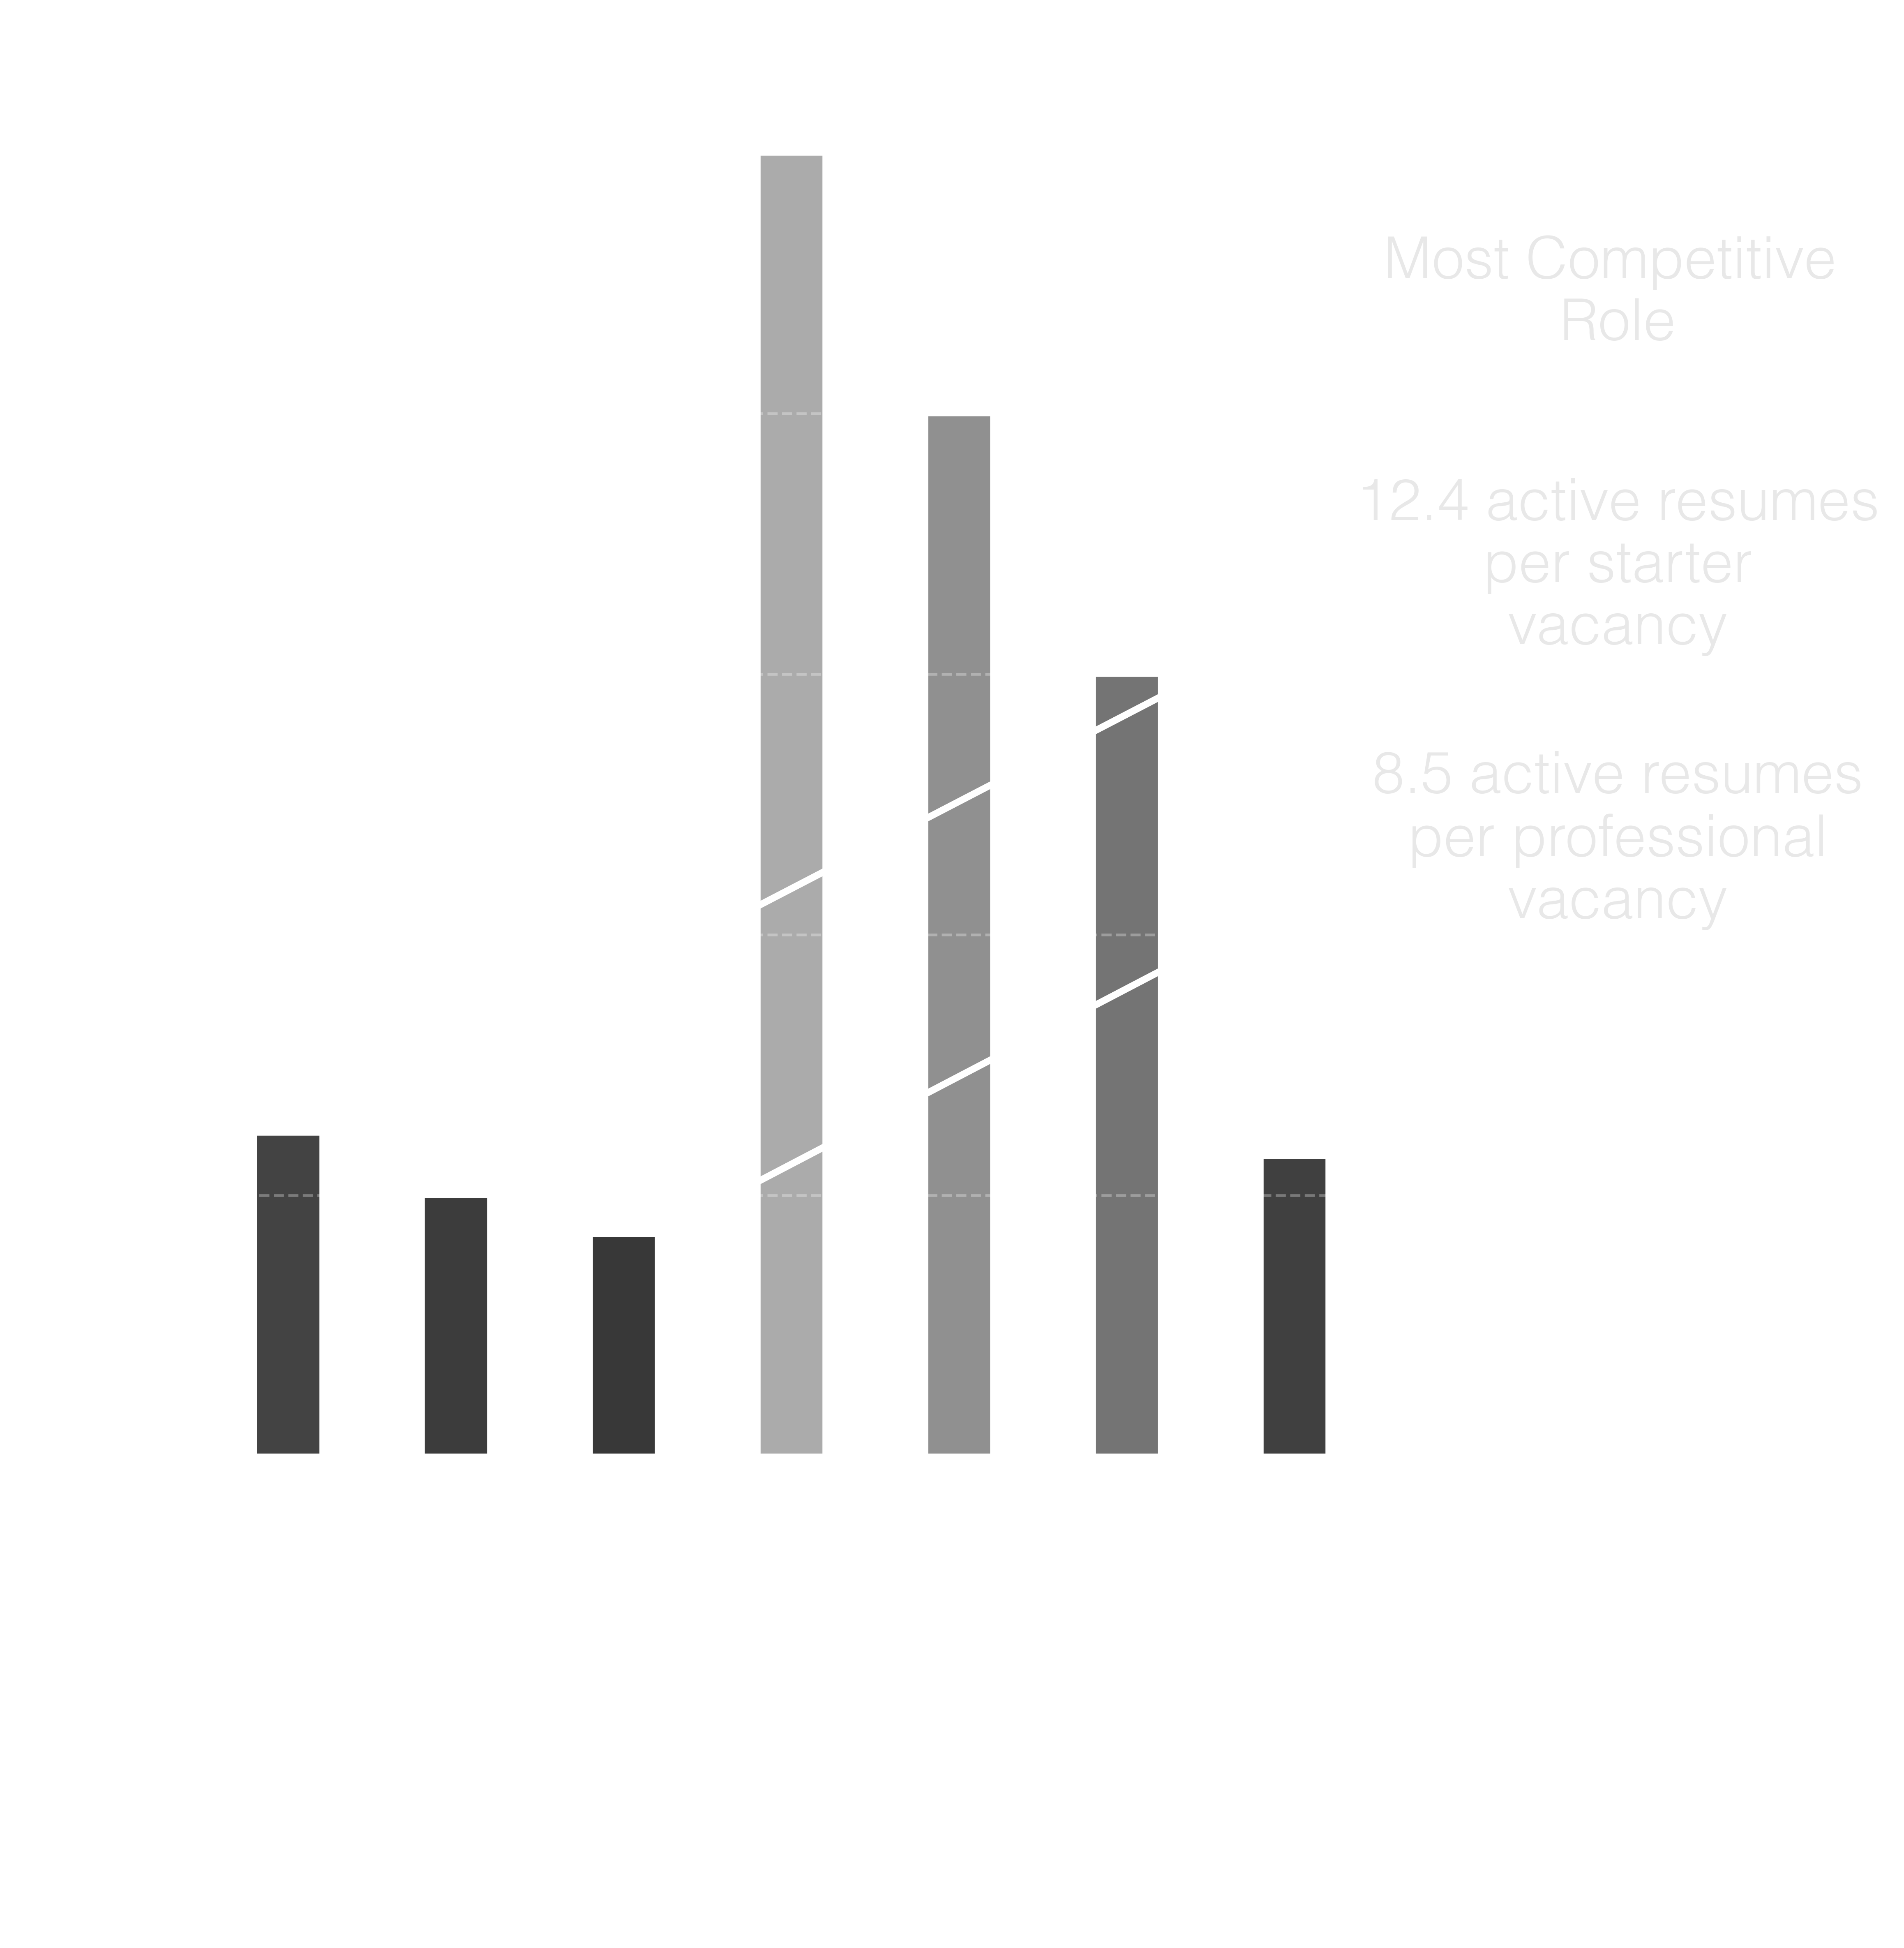

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
roles = ['Finance Analyst', 'Finance Manager', 'Treasury Specialist', 
         'Investment Analyst (min)', 'Fund Analyst (min)', 
         'Auditor / Consultant', 'Financial Controller']
applicants = [12.4, 10.0, 8.5, 50.0, 40.0, 30.0, 11.5]

# Calculate normalized values for color gradient (0 = black, 1 = white)
min_val = min(applicants)-20
max_val = max(applicants)+30
normalized = [(val - min_val) / (max_val - min_val) for val in applicants]
colors = [(n, n, n) for n in normalized]  # Grayscale RGB tuples

# Create figure with transparent background
fig, ax = plt.subplots(figsize=(8, 8), facecolor='none',dpi=600)
ax.patch.set_alpha(0)  # Make axes background transparent

# Plot narrower bars with reduced spacing
x = np.arange(len(roles))
bar_width = 0.4
bars = ax.bar(x, applicants, width=bar_width, color=colors, edgecolor='white', linewidth=1.5)
# White gridlines (optional)
ax.grid(axis='y', color='white', alpha=0.3, linestyle='--')



# Side panel annotations with arrows

ax.text(1.20, 0.85, 'Most Competitive \nRole', 
        transform=ax.transAxes, fontsize=17, color="#e8e8e8", ha='center', va='center',family=['Helvetica Light'])
ax.text(1.20, 0.45, '8.5 active resumes\nper professional\nvacancy', 
        transform=ax.transAxes, fontsize=17, color='#e8e8e8', ha='center', va='center',family=['Helvetica Light'])
ax.text(1.20, 0.65, '12.4 active resumes\nper starter\nvacancy', 
        transform=ax.transAxes, fontsize=17, color='#e8e8e8', ha='center', va='center',family=['Helvetica Light'])

# Connect annotations to bars with arrows
ax.annotate('', 
            xy=(x[3]+0.2, applicants[3]), xycoords='data',
            xytext=(0.98, 0.83), textcoords='axes fraction',
            arrowprops=dict(facecolor='white', edgecolor='white', width=1, headwidth=8))

ax.annotate('', 
            xy=(x[2]+0.2, applicants[2]), xycoords='data',
            xytext=(0.98, 0.43), textcoords='axes fraction',
            arrowprops=dict(facecolor='white', edgecolor='white', width=1, headwidth=8))
ax.annotate('', 
            xy=(x[0]+0.2, applicants[0]), xycoords='data',
            xytext=(0.98, 0.63), textcoords='axes fraction',
            arrowprops=dict(facecolor='white', edgecolor='white', width=1, headwidth=8))


# Add numerical labels on top of bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', 
            ha='center', va='bottom', color='white', fontsize=9)

# White text formatting
ax.set_title('Intense Competition for Different Roles', color='white', fontsize=17, fontweight='bold',family=['Helvetica Rounded'])
ax.set_ylabel('Applicants per Position', color='white', fontsize=14, fontweight='bold',family=['Helvetica Rounded'])
ax.set_xticks(x)
ax.set_xticklabels(roles, rotation=45, ha="right", rotation_mode="anchor", color='white',family=['Helvetica Rounded'])
ax.tick_params(axis='both', colors='white', labelsize=14)

# Remove spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.tight_layout()
plt.show()

C:\Users\Rog G16\AppData\Local\Temp\ipykernel_30604\2523538243.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(skills, rotation=15, ha="right", size=12, rotation_mode="anchor", color='white',family=['Helvetica Rounded'])


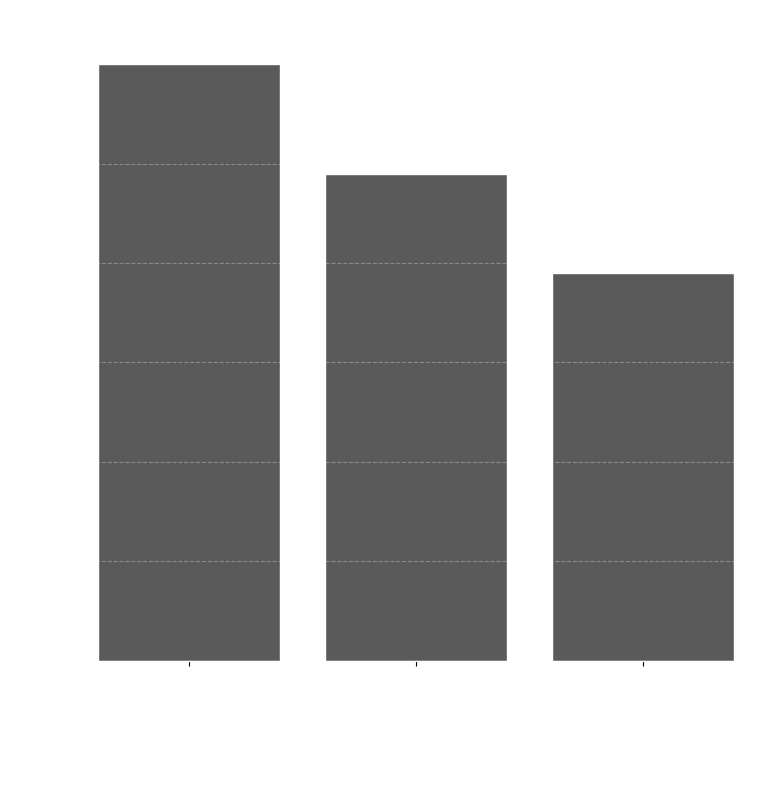

In [32]:
import matplotlib.pyplot as plt

# Data preparation
skills = [
    "Lack of Practical Skills",
    "Knowledge of Specialized Software",
    "Knowledge of Corporate Cybersecurity Tools"
]
percentages = [60, 49, 39]

# Create figure and axis with transparent background
fig, ax = plt.subplots(figsize=(8,8))
fig.patch.set_alpha(0.0)  # Full transparency for figure background
ax.set_facecolor('none')  # Full transparency for axes background

# Plot bars with transparent background
bars = ax.bar(skills, percentages, color='#5A5A5A', edgecolor='white')

# Add value labels with hardcoded font
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}%',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                color='white',
                fontsize=10,
                fontfamily='Helvetica Light')

# Title with hardcoded font
ax.set_title('Skill Gaps in Financial Sector',
              color='white',family=['Helvetica Rounded'],
              fontsize=16)

# Y-axis label with hardcoded font
ax.set_ylabel('Percentage of Companies Reporting Gap',
              color='white',family=['Helvetica Rounded'],
              fontsize=14)


# Y-axis tick labels with hardcoded font
ax.tick_params(axis='y', colors='white', labelsize=9)
for label in ax.get_yticklabels():
    label.set_fontname('Helvetica Light')

# Grid and spines styling (with transparency considerations)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(axis='y', linestyle='--', alpha=0.3, color='white')  # Lighter grid for transparency
ax.set_xticklabels(skills, rotation=15, ha="right", size=12, rotation_mode="anchor", color='white',family=['Helvetica Rounded'])


# Ensure layout doesn't cut off elements
plt.tight_layout()
plt.show()

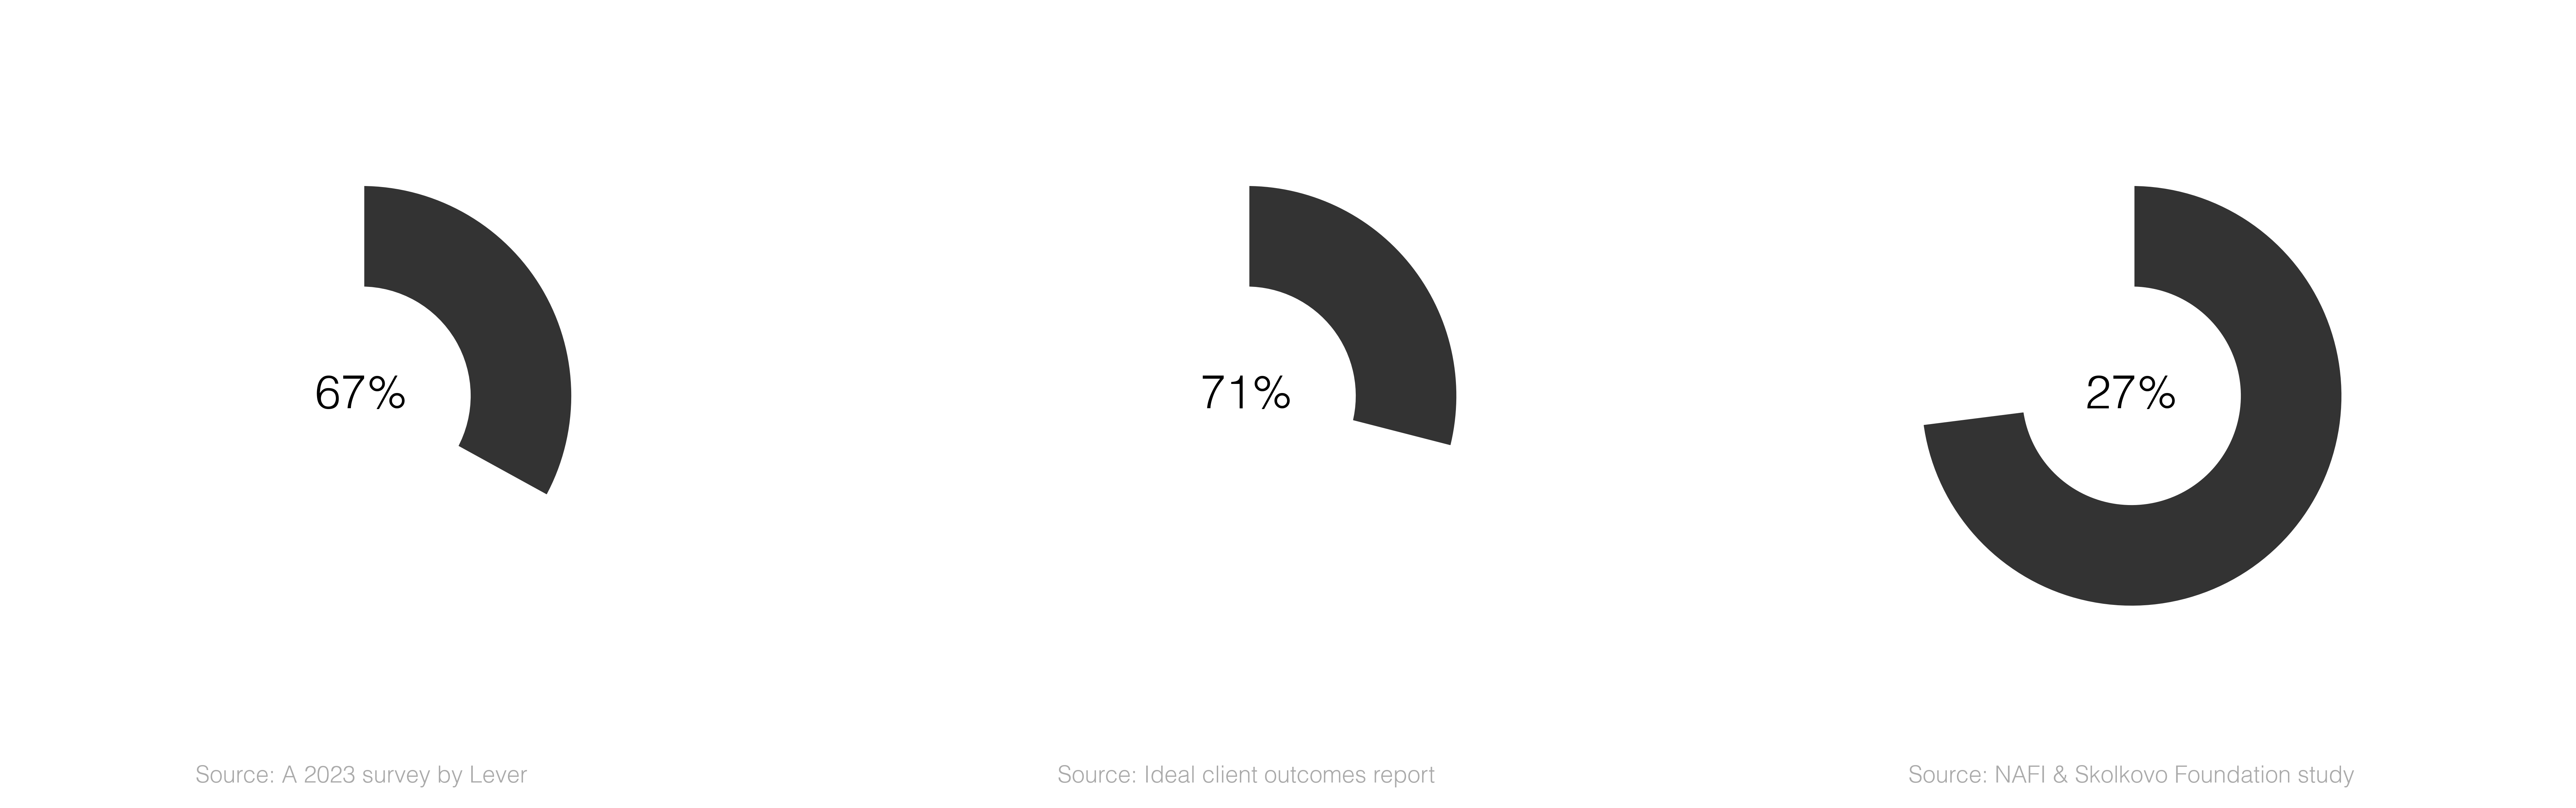

In [ ]:
import matplotlib.pyplot as plt

# Data
percentages = [67, 71, 27]
titles = [
    "Time Saved\n(Hiring managers who save time using AI)",
    "Better Candidates\n(Recruiters who found the right candidate with AI's help)",
    "Russian Adoption\n(Russian companies planning regular AI use in HR by 2026)"
]
sources = [
    "Source: A 2023 survey by Lever",
    "Source: Ideal client outcomes report",
    "Source: NAFI & Skolkovo Foundation study"
]

# Create figure with transparent background
fig, axs = plt.subplots(1, 3, figsize=(12, 4), facecolor='none', dpi=600)
colors = ['#ffffff', '#333333']  # White and dark gray

for i, ax in enumerate(axs):
    # Create donut chart
    wedges, texts = ax.pie(
        [percentages[i], 100 - percentages[i]], 
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2)
    )
    
    # Add percentage label
    ax.text(
        0, 0, f"{percentages[i]}%",
        ha='center', va='center', fontsize=16, color='black',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
    )
    
    # Title with formatted text
    ax.set_title(titles[i], pad=20, fontsize=10, color='white', family=['Helvetica Rounded'])
    
    # Add source text
    ax.text(
        0.5, -0.2, sources[i],
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=8, color='#AAAAAA', family=['Helvetica Light']
    )
    
    # Formatting
    ax.axis('equal')
    ax.set_facecolor('none')

# Final adjustments
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, wspace=0.3)

# Save with transparent background
plt.savefig('ai_recruitment_stats_with_sources.png', transparent=True, dpi=200)
plt.show()

C:\Users\Rog G16\AppData\Local\Temp\ipykernel_30604\1741005167.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(50*i) for i in range(6)], fontsize=10, color = 'white')  # Reverse labels for funnel orientation


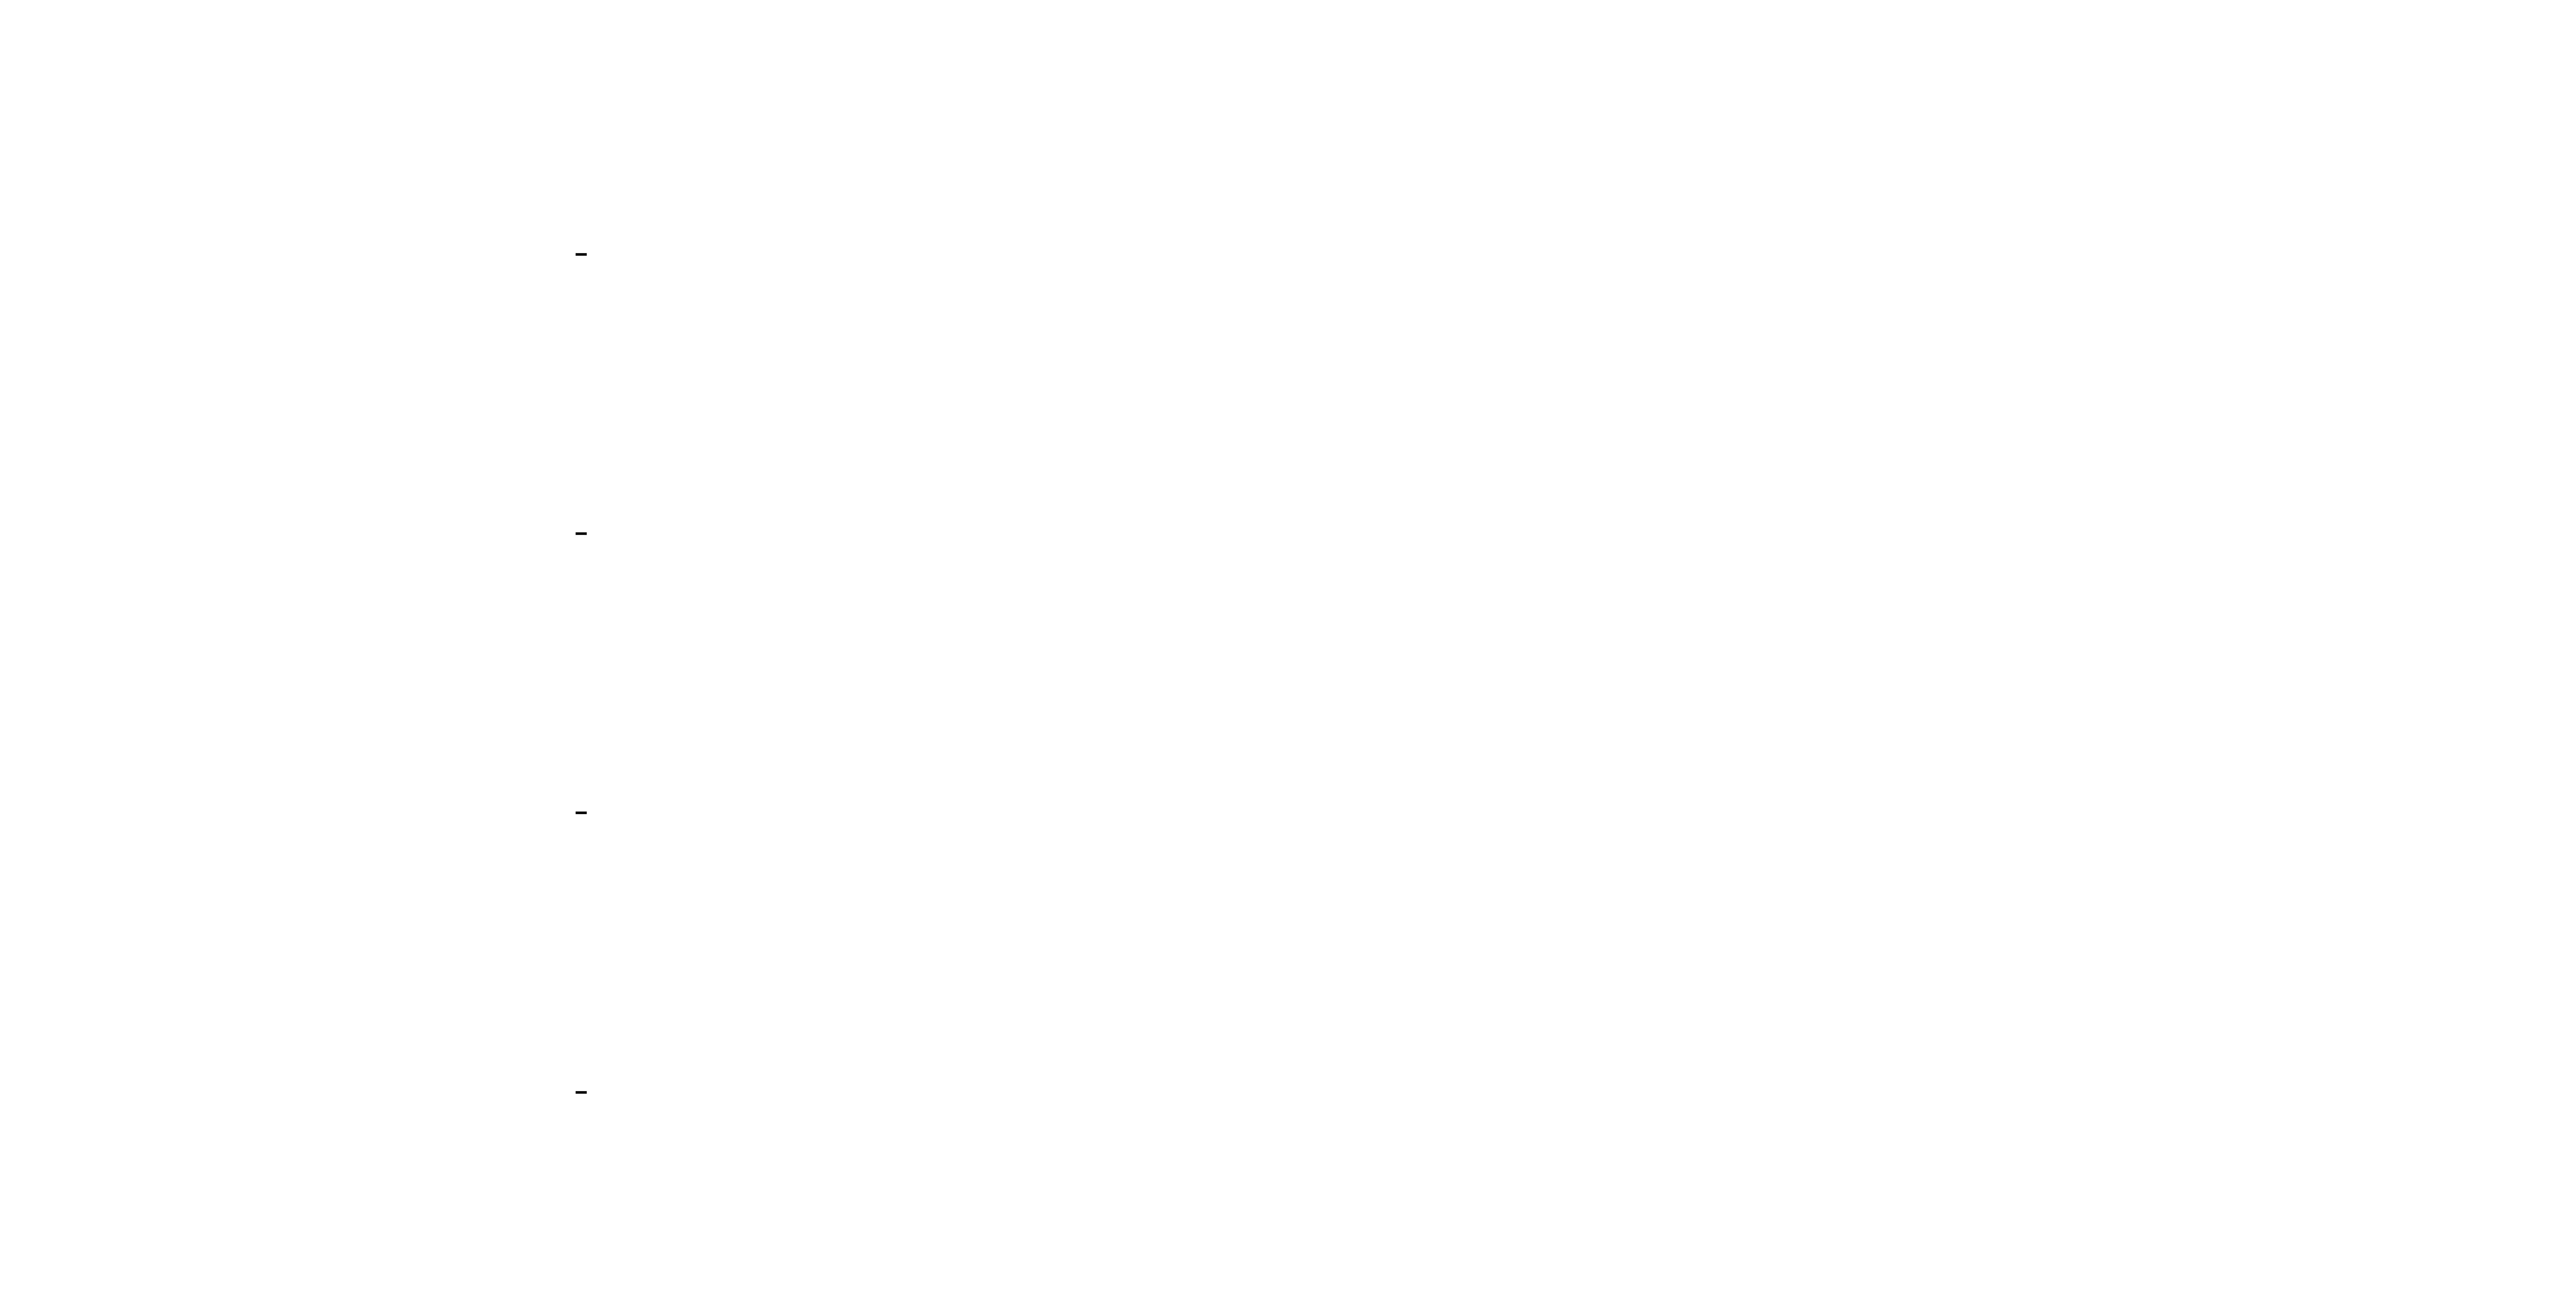

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'light'

# Data configuration (reversed order for funnel shape)
sections = [
    "AI-Powered Shortlist",
    "Automated Screening (Chatbot/Video)",
    "AI Resume Screening (ATS)",
    "250+ Resumes Submitted"
]

values = [10, 25, 60, 250][::-1]
descriptions = [
    "The top 5-10 candidates are presented to the human recruiter.",
    "Further filtering based on engagement and initial answers. ~25 candidates advance.",
    "~75% of candidates are filtered out. Only ~60 resumes pass.",
    "The total applicant pool for a single role."
][::-1]

# Create figure with transparent background
fig, ax = plt.subplots(figsize=(10, 6), dpi = 600)
fig.patch.set_alpha(0)
ax.set_facecolor('none')

# Plot horizontal bars in reversed order
y_positions = range(len(values))
bar_height = 0.6
for i, (value, label) in enumerate(zip(values, sections)):
    ax.barh(y_positions[i], value, height=bar_height, color='white', edgecolor='none')
    ax.text(
        value + 5, 
        y_positions[i] - bar_height/2 + 0.3, 
        descriptions[i], 
        va='center', 
        fontsize=9, 
        color='white'
    )

# Configure axes
ax.set_yticks(y_positions)
ax.set_yticklabels(sections[::-1], fontsize=10, color = 'white')  # Reverse labels for funnel orientation
ax.set_xticklabels([str(50*i) for i in range(6)], fontsize=10, color = 'white')  # Reverse labels for funnel orientation

ax.tick_params(axis='x', length=0, color='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('white')

# Title configuration
ax.set_title(
    'The AI Hiring Funnel: From 250 Applicants to 1 Shortlist', 
    fontsize=14, 
    pad=20,
    color='white'
)

# Invert y-axis for funnel shape
ax.invert_yaxis()

# Final adjustments
plt.tight_layout()
plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.1)

# Save with transparent background
# plt.savefig('aero_funnel.png', facecolor='none', transparent=True, dpi=200)

In [2]:
text = '''A powerful assistant for developers and students.
• Browse & search code libraries and your own GitHub repos. 
• Execute Python code and get back plots and text. 
• Render LaTeX formulas and Mermaid diagrams into images. 
• View Markdown files as Telegra.ph articles, HTML, or text. 
• Save favorites and customize your experience with /settings.'''


len(text)

346